In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error

In [2]:
plt.rc('font',family = 'malgun gothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action = 'ignore')

# 의사결정 회귀나무

* 예제를 보며 의사결정 회귀나무에 대해서 알아보자 

* -10과 10 시아의 실수 X와 난수를 포함한 2차 그래프 형태의 Y 값의 데이터를 가지고 실습을 진행하자 

In [3]:
X = np.arange(-10,10,0.1)
Y = -X**2 + 3*X + 200 + 30 * np.random.randn(200)

Text(0.5, 1.0, '예제 데이터')

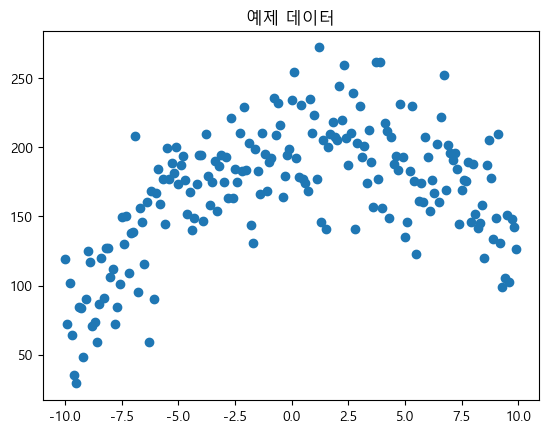

In [4]:
plt.scatter(X,Y)
plt.title('예제 데이터')


# 의사결정나무의 분할기준

* criterion : {"squared_error", "friedman_mse", "absolute_error", "poisson"}, default="squared_error" 

* 분할 기준은 MSE,fridman_mse, absolute_error, poission 이 있는데 이번 실습에선 MSE 만 가지고 진행해보자

* 의사결정 분류나무때와 같이 의사결정나무는 입력값을 타겟값을 가장 잘 나눌 수 있는 기준을 탐욕적 탐색을 통해 적절한 분할 기준을 찾는다.

* 분할 기준은 MSE 를 가장 낮게 하는 입력값들을 하나의 leaf 로 둔 후, 각 leaf의 MSE 를 가장 낮게 만들어주는 r 이라는 값으로 그들의 값을 예측한다.

* 여기서 r 은 그들의 MSE 를 가장 최소화 하게 해주는 값인데, 이는 그들의 평균값을 의미한다


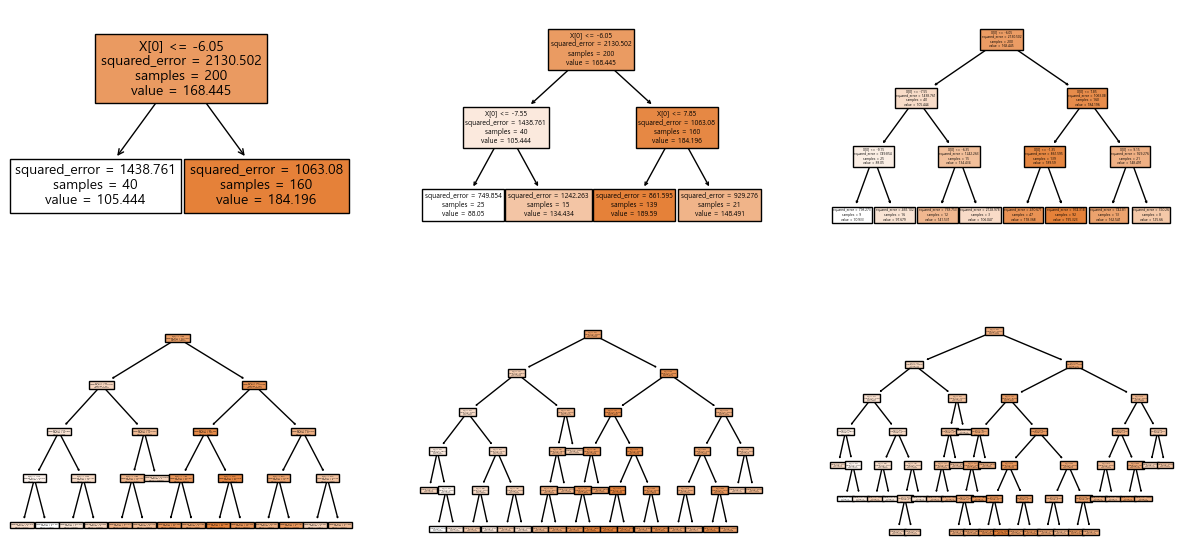

In [5]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

plt.figure(figsize = [15,7])

plt.subplots_adjust(hspace = 0.3)

max_depth = range(1,7)

for num,depth in enumerate(max_depth):
    
    model = DecisionTreeRegressor(max_depth = depth, min_samples_leaf = 3)
    
    model.fit(X,Y)
    
    plt.subplot(2,3,num+1)
    plot_tree(model, filled = True)

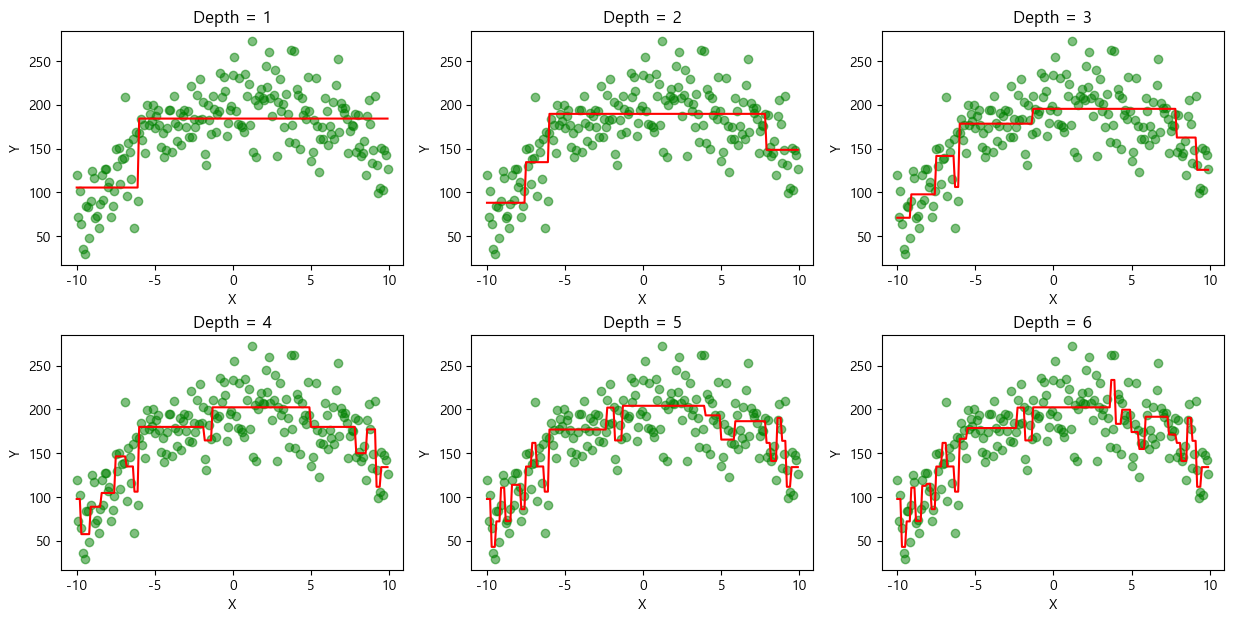

In [6]:
plt.figure(figsize = [15,7])

plt.subplots_adjust(hspace = 0.3)

max_depth = range(1,7)

for num,depth in enumerate(max_depth):
    
    
    
    model = DecisionTreeRegressor(max_depth = depth, min_samples_leaf = 3)
    
    model.fit(X,Y)
    
    predict = model.predict(X).reshape(-1,1)
    
    plt.subplot(2,3,num+1)
    plt.scatter(X,Y, c = 'green', alpha = 0.5)
    plt.plot(X,predict,c = 'r')
    
    plt.title(f'Depth = {depth}')
    plt.xlabel('X')
    plt.ylabel('Y')

### 의사결정회귀나무의 min_samples_leaf 의 default 값은 1이다.

### min_samples_leaf 의 값을 바꿔가며 fitting 시켜보고 새로운 값이 들어왔을 때의 mse 값을 측정해보자

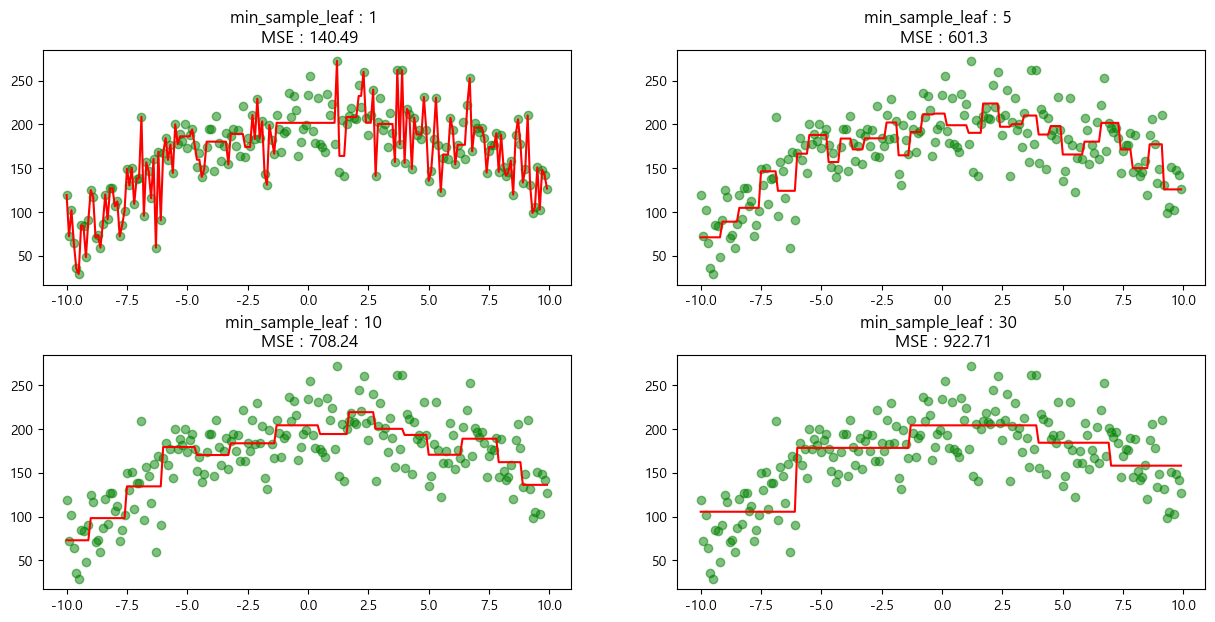

In [7]:
plt.figure(figsize = [15,7])
plt.subplots_adjust(hspace = 0.3)
plt.subplot(1,2,1)

leafs = [1,5,10,30]

num = 1

for leaf in leafs:
    
    
    model = DecisionTreeRegressor(max_depth = 10 ,min_samples_leaf = leaf)
    model.fit(X,Y)
    
    predict = model.predict(X)
    
    mse = round(mean_squared_error(Y,predict),2)
    
    plt.subplot(2,2,num)
    plt.scatter(X,Y, c = 'green', alpha = 0.5)
    plt.plot(X,predict, c = 'r')
    plt.title(f'min_sample_leaf : {leaf} \n MSE : {mse}')
    
    num += 1

* min_sample_leaf 가 1인 모델은 훈련세트에 오버피팅을 시켰기 때문에 mse 값이 가장 낮은 것을 볼 수 있다.
* 새로운 데이터셋이 들어온다면 어떨까? 새로운 데이터셋에도 점수가 가장 높을까?

In [8]:
X_new = np.arange(-10,10,0.3)
Y_new = -X_new**2 + 3*X_new + 200 + 30 * np.random.randn(67)

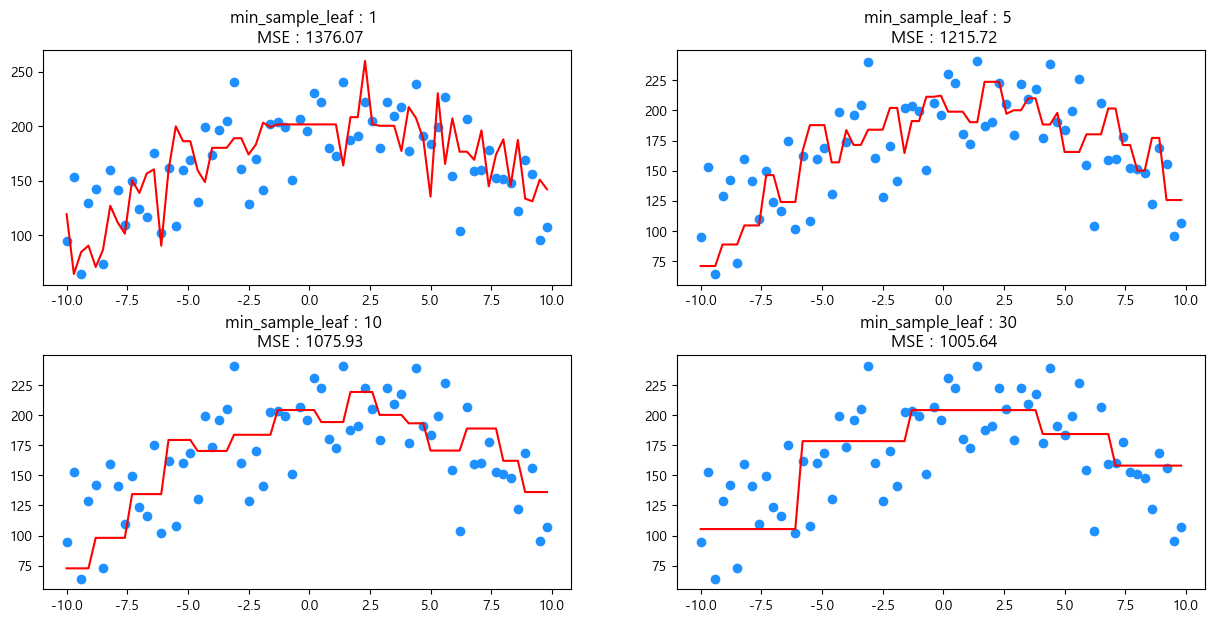

In [9]:
plt.figure(figsize = [15,7])
plt.subplots_adjust(hspace = 0.3)
plt.subplot(1,2,1)

num = 1

for leaf in leafs:
    
    plt.subplot(2,2,num)
    
    model = DecisionTreeRegressor(max_depth = 10 ,min_samples_leaf = leaf)
    model.fit(X,Y)
    
    predict = model.predict(X_new.reshape(-1,1))
    
    mse = round(mean_squared_error(Y_new,predict),2)
    
    plt.scatter(X_new,Y_new, c = 'dodgerblue')
    plt.plot(X_new,predict, c = 'r')
    plt.title(f'min_sample_leaf : {leaf} \n MSE : {mse}')
    
    num += 1

* 과적합 되었을 때는 test set 에 대해서 상당히 점수가 낮은 것을 볼 수 있으며, 오히려 일반화가 될 수록 새로운 test set 에 대해서 예측률이 높은 모습을 볼 수 있다.

* 이와 같이 적절한 규제를 통해 오버피팅을 방지 해야한다. 

* 그렇다면 오버피팅을 방지하기 위해서 어떻게 적절한 하이퍼 파라미터를 선택 할 수 있을까 ?

# 적절한 하이퍼 파라미터를 추정하기 위한 방법

# GridsearchCV

* 조건에 맞는 하이퍼파라미터를 GridsearchCV에 담아주고 진행하게 되면 , 내가 지정한 validation set 갯수만큼 교차검증을 통해

* 평균 점수가 높은 최적의 파라미터를 리턴해준다.

In [10]:
from sklearn.model_selection import GridSearchCV,train_test_split


x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

In [11]:
param_grid = {'max_depth':range(1,31),
              'min_samples_leaf':range(1,31)}

grid_tree = GridSearchCV(model, param_grid = param_grid, cv = 10, verbose = 1, scoring = 'neg_mean_squared_error')
grid_tree.fit(x_train,y_train)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=10, min_samples_leaf=30),
             param_grid={'max_depth': range(1, 31),
                         'min_samples_leaf': range(1, 31)},
             scoring='neg_mean_squared_error', verbose=1)

* 900 개의 조건수에 대한 모형들을 총 9000번의 교차 과정을 통해 최적의 하이퍼파라미터를 찾아내는데까지 걸린 시간은 단 4.8초였다.

In [13]:
result = pd.DataFrame(grid_tree.cv_results_)[['params','mean_test_score']]
result['mean_test_score'] = abs(result['mean_test_score'])

result = result.sort_values(by = 'mean_test_score') # 이런식을 10번의 교차검증 과정 동안 가장 MSE 가 가장 낮은 값의 파라미터 조차 알아낼 수 있다.

display(result)

print('--' * 40)

print('최적의 하이퍼 파라미터는 :',grid_tree.best_params_)

,params,mean_test_score
96,"{'max_depth': 4, 'min_samples_leaf': 7}",1049.544164
95,"{'max_depth': 4, 'min_samples_leaf': 6}",1056.387882
94,"{'max_depth': 4, 'min_samples_leaf': 5}",1067.416885
97,"{'max_depth': 4, 'min_samples_leaf': 8}",1076.939876
98,"{'max_depth': 4, 'min_samples_leaf': 9}",1079.191900
...,...,...
840,"{'max_depth': 29, 'min_samples_leaf': 1}",1700.930709
510,"{'max_depth': 18, 'min_samples_leaf': 1}",1700.930709
810,"{'max_depth': 28, 'min_samples_leaf': 1}",1700.930709
720,"{'max_depth': 25, 'min_samples_leaf': 1}",1700.930709


--------------------------------------------------------------------------------
최적의 하이퍼 파라미터는 : {'max_depth': 4, 'min_samples_leaf': 7}


* cv_result_ 를 통해서 각 파라미터에 따라 test score 가 얼마나 높은지도 알 수 있었다.

# 갑자기 들은 의문

# 회귀분석이랑은 성능 차이는 어떨까 ? 

* 현재 공부하고 있는 핸즈온 머신러닝 책에서는 의사결정회귀나무는 성능이 떨어지기 때문에 잘 사용하지 않는다고 한다.
* 물론 다양한 부스팅 기법을 활용하면 단점을 극복할 수 있겠지만

* 그래도 실험삼아 해보자


In [14]:
from sklearn.linear_model import LinearRegression

poly_data = np.hstack((X,X**2)) #다항 화귀분석을 시행하기 위해 다중항 추가 

linear = LinearRegression()

linear.fit(poly_data,Y)

LinearRegression()

In [15]:
linear_predict = linear.intercept_ + linear.coef_[0][0] * X_new + linear.coef_[0][1] * X_new**2 

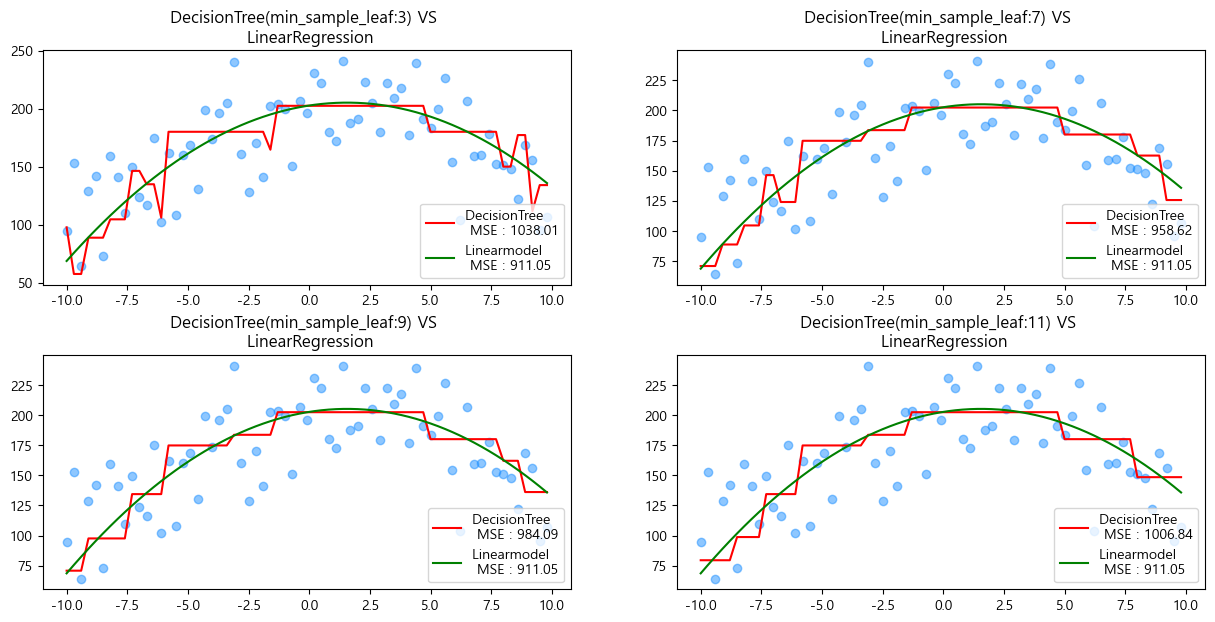

In [16]:
plt.figure(figsize = [15,7])
plt.subplots_adjust(hspace = 0.3)
plt.subplot(1,2,1)

leafs = [3,7,9,11]

num = 1

for leaf in leafs:
    
    plt.subplot(2,2,num)
    
    model = DecisionTreeRegressor(max_depth = 4 ,min_samples_leaf = leaf)
    model.fit(X,Y)
    
    predict = model.predict(X_new.reshape(-1,1))
    
    DecisionTreeMSE = round(mean_squared_error(Y_new,predict),2)
    LinearRegressionMSE = round(mean_squared_error(Y_new,linear_predict),2)
    
    plt.scatter(X_new,Y_new, c = 'dodgerblue', alpha = 0.5)
    plt.plot(X_new,predict, c = 'r', label = f'DecisionTree \n MSE : {DecisionTreeMSE}')
    plt.plot(X_new,linear_predict, c = 'green', label = f'Linearmodel \n MSE : {LinearRegressionMSE}')
    plt.legend(loc = 'lower right')
    plt.title(f'DecisionTree(min_sample_leaf:{leaf}) VS \n LinearRegression')
    
    num += 1

* 확실하게 일반적인 회귀 분석에 비해서 MSE 값이 높은 것을 볼 수 있다.
* 물론 추후 랜덤포레스트나 다양한 부스팅 모델들을 통해서 단점을 극복하였다고 하는데 한 번 나중에도 실험해봐야겠다.